In [ ]:
import os
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import random

# Update this with the actual path where you extracted the GloVe files
glove_path = r"C:\Users\Rose\Documents\mcmaster\semester 2\NLP\assignments\glove.6B\glove.6B.100d.txt"
# Load GloVe embeddings
glove_embeddings = {}

with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]  # First value is the word
        vector = np.array(values[1:], dtype=np.float32)  # The rest are vector values
        glove_embeddings[word] = vector

print(f"GloVe embeddings loaded! {len(glove_embeddings)} words in vocabulary.")



GloVe embeddings loaded! 400000 words in vocabulary.


In [ ]:
word = "king"
if word in glove_embeddings:
    print(f"Vector for '{word}':\n{glove_embeddings[word]}")
else:
    print(f"'{word}' not found in GloVe!")


Vector for 'king':
[-0.32307  -0.87616   0.21977   0.25268   0.22976   0.7388   -0.37954
 -0.35307  -0.84369  -1.1113   -0.30266   0.33178  -0.25113   0.30448
 -0.077491 -0.89815   0.092496 -1.1407   -0.58324   0.66869  -0.23122
 -0.95855   0.28262  -0.078848  0.75315   0.26584   0.3422   -0.33949
  0.95608   0.065641  0.45747   0.39835   0.57965   0.39267  -0.21851
  0.58795  -0.55999   0.63368  -0.043983 -0.68731  -0.37841   0.38026
  0.61641  -0.88269  -0.12346  -0.37928  -0.38318   0.23868   0.6685
 -0.43321  -0.11065   0.081723  1.1569    0.78958  -0.21223  -2.3211
 -0.67806   0.44561   0.65707   0.1045    0.46217   0.19912   0.25802
  0.057194  0.53443  -0.43133  -0.34311   0.59789  -0.58417   0.068995
  0.23944  -0.85181   0.30379  -0.34177  -0.25746  -0.031101 -0.16285
  0.45169  -0.91627   0.64521   0.73281  -0.22752   0.30226   0.044801
 -0.83741   0.55006  -0.52506  -1.7357    0.4751   -0.70487   0.056939
 -0.7132    0.089623  0.41394  -1.3363   -0.61915  -0.33089  -0.52881


In [ ]:

# Function to find similar words
def find_similar_glove(word, top_n=5):
    if word not in glove_embeddings:
        print(f"'{word}' not in GloVe vocabulary!")
        return []

    word_vec = glove_embeddings[word].reshape(1, -1)
    similarities = {
        other_word: cosine_similarity(word_vec, glove_embeddings[other_word].reshape(1, -1))[0][0]
        for other_word in glove_embeddings.keys()
    }

    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[1:top_n+1]

# Example: Find words similar to "king"
print(find_similar_glove("king"))


[('prince', 0.76823294), ('queen', 0.7507691), ('son', 0.70208883), ('brother', 0.6985776), ('monarch', 0.6977891)]


D:\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23459 (\N{CJK UNIFIED IDEOGRAPH-5BA3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27494 (\N{CJK UNIFIED IDEOGRAPH-6B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29579 (\N{CJK UNIFIED IDEOGRAPH-738B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


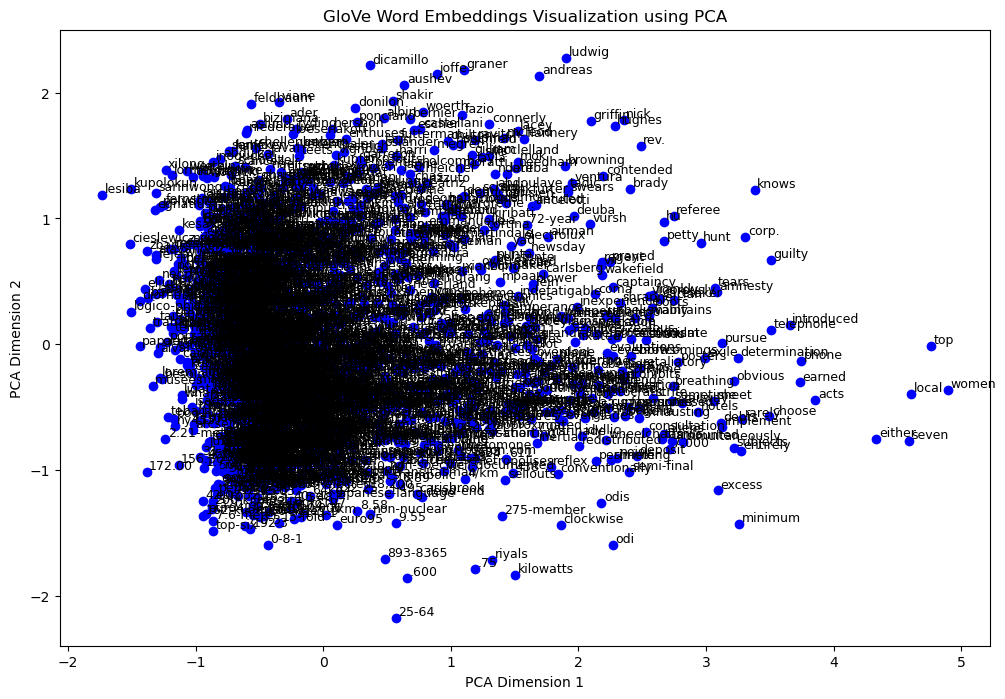

In [ ]:


# Select 50 random words from GloVe for visualization
selected_words = random.sample(list(glove_embeddings.keys()), 2000)
word_vectors = np.array([glove_embeddings[word] for word in selected_words])

# Reduce dimensions from 100D → 2D
pca = PCA(n_components=2, random_state=42)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot words in 2D space
plt.figure(figsize=(12, 8))
for i, word in enumerate(selected_words):
    x, y = word_vectors_2d[i]
    plt.scatter(x, y, color='blue')
    plt.text(x+0.02, y+0.02, word, fontsize=9)

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("GloVe Word Embeddings Visualization using PCA")
plt.show()


In [ ]:
#Question 3:

In [ ]:
import numpy as np

# Function to perform analogy task
def analogy_task(word1, word2, word3, glove_embeddings, top_n=1):
    """
    Solves an analogy task: word1 - word2 + word3 = ?
    Example: king - man + woman = queen
    """
    if word1 not in glove_embeddings or word2 not in glove_embeddings or word3 not in glove_embeddings:
        print(f"❌ One or more words not found in GloVe vocabulary!")
        return []

    # Compute the analogy vector: word1 - word2 + word3
    analogy_vector = glove_embeddings[word1] - glove_embeddings[word2] + glove_embeddings[word3]

    # Compute cosine similarity with all words in GloVe
    similarities = {
        other_word: np.dot(analogy_vector, glove_embeddings[other_word]) /
                    (np.linalg.norm(analogy_vector) * np.linalg.norm(glove_embeddings[other_word]))
        for other_word in glove_embeddings.keys()
    }

    # Sort and get the top_n most similar words (excluding input words)
    sorted_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    # Remove input words from the results
    filtered_results = [word for word in sorted_similar if word[0] not in {word1, word2, word3}][:top_n]

    return filtered_results


In [ ]:
result = analogy_task("king", "man", "woman", glove_embeddings)
print(f"🔍 'king' - 'man' + 'woman' = {result}")


🔍 'king' - 'man' + 'woman' = [('queen', 0.7834413)]


In [ ]:
#as we can see in the analogy task, the result is logical! this show the ability of the pretrained model to understand the words relationships
# based on these relationships, the model understood that king consists of two meaning, masculinity and royalty, by subtracting man and adding
#woman it will become a word which is feminine and has the royalty meaning at the same time. which is closest to queen.

In [ ]:
# Function to find the top N most similar words in GloVe
test_words = ["king", "doctor", "slay", "thin", "happy", "science"]
def find_similar_glove(word, top_n=5):
    if word not in glove_embeddings:
        print(f"❌ '{word}' not found in GloVe vocabulary!")
        return []

    word_vec = glove_embeddings[word].reshape(1, -1)
    similarities = {
        other_word: cosine_similarity(word_vec, glove_embeddings[other_word].reshape(1, -1))[0][0]
        for other_word in glove_embeddings.keys()
    }

    # Sort and get top_n most similar words (excluding the input word)
    sorted_similar = sorted(similarities.items(), key=lambda x: x[1], reverse=True)[1:top_n+1]
    return sorted_similar

# Find most similar words using GloVe
for word in test_words:
    similar_words = find_similar_glove(word, top_n=5)
    print(f"\n🔹 GloVe - Most similar to '{word}':")
    for w, sim in similar_words:
        print(f"  - {w}: {sim:.4f}")



🔹 GloVe - Most similar to 'king':
  - prince: 0.7682
  - queen: 0.7508
  - son: 0.7021
  - brother: 0.6986
  - monarch: 0.6978

🔹 GloVe - Most similar to 'doctor':
  - physician: 0.7673
  - nurse: 0.7522
  - dr.: 0.7175
  - doctors: 0.7081
  - patient: 0.7074

🔹 GloVe - Most similar to 'slay':
  - outrun: 0.5179
  - apprehend: 0.4853
  - slays: 0.4683
  - cain: 0.4676
  - gunning: 0.4610

🔹 GloVe - Most similar to 'thin':
  - thick: 0.7357
  - flat: 0.6920
  - dark: 0.6791
  - soft: 0.6638
  - thicker: 0.6550

🔹 GloVe - Most similar to 'happy':
  - 'm: 0.8413
  - feel: 0.8133
  - 're: 0.8048
  - i: 0.7938
  - 'll: 0.7916

🔹 GloVe - Most similar to 'science':
  - sciences: 0.8073
  - physics: 0.7915
  - institute: 0.7663
  - mathematics: 0.7608
  - studies: 0.7590


In [ ]:
# Semantic relationships involve meaning-based words:
#because of the large data set and the capabalities of GloVe to work with large data sets, it Captures Semantic Relationships Better:
#"king" is closest to "prince", "queen", "monarch"
#GloVe clearly understands the royalty concept.
#and the other example is word "doctor" GloVe found "physician", "nurse", "patient"
#GloVe recognizes medical-related terms, grouping them logically
# but on the other hand, results from Word2Vec:
#"king" is similar to "esther", "haman", "babylon"
# we have to consider that the data set for W2v was very small and more related to old,religious novels. thats why it is not like the results in GloVe.
#moreover the word "doctor" is close to "vane" ,"landlady", "politely"
#The model doesn't retrieve related medical terms. It suggests words based on narrative context, not meaning.
#Conclusion on Semantic Relationships
#GloVe performs better for semantic similarities.
#Word2Vec struggles with meaning-based connections, likely due to the dataset containing older texts.


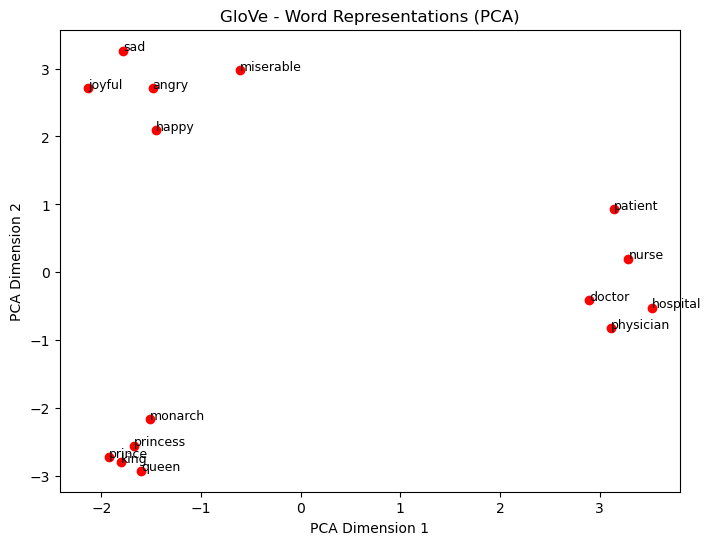

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Word groups to compare
word_groups = ["king", "queen", "prince", "princess", "monarch",
               "doctor", "nurse", "physician", "hospital", "patient",
               "happy", "sad", "angry", "joyful", "miserable"]

# Extract vectors from GloVe
word_vectors_glove = np.array([glove_embeddings[word] for word in word_groups])

# Reduce dimensions from 100D → 2D using PCA
pca = PCA(n_components=2)
word_vectors_glove_2d = pca.fit_transform(word_vectors_glove)

# Plot GloVe embeddings
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_glove_2d[:, 0], word_vectors_glove_2d[:, 1], color="red")

# Add labels to points
for i, word in enumerate(word_groups):
    plt.text(word_vectors_glove_2d[i, 0], word_vectors_glove_2d[i, 1], word, fontsize=9)

plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.title("GloVe - Word Representations (PCA)")

# Save the plot
plt.savefig("glove_pca_plot.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
#when we compare these two files together, the plot form W2v and GloVe we can see that words have better clustering in Glove,
#as we can see monarch proncess and king and queen are in one place words related to doctors are in one area, and similarly the emotions.
#but this words in the W2v plot are more scattered and were not seperated properly.
#but this doesnt indicate that W2v is not good enough, in my opinion w2v here doesnt show good results because if the feeding dataset
#which is small and at the same time very limited while the glove one has more variety in the input. also glove works better on large datasets